In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
import Data_Clean as dc

In [3]:
df = pd.read_csv("train.csv")

In [5]:
print(df.shape)

(891, 12)


Text(0.5,1,'Class')

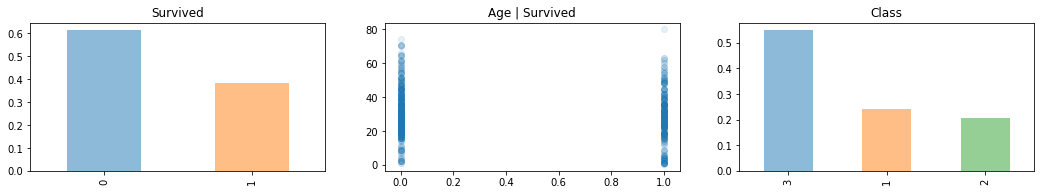

In [25]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3), (0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5) #normalize changes Y to percentage
plt.title("Survived")

plt.subplot2grid((2,3), (0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1) #first X axis, second Y
plt.title("Age | Survived")

plt.subplot2grid((2,3), (0,2))
df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5) #normalize changes Y to percentage
plt.title("Class")

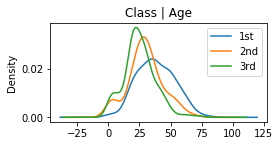

In [34]:
plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Class | Age")
plt.legend(("1st", "2nd", "3rd"))

In [ ]:
#Now adding gender as dimension

In [41]:
female_color = "#FA0000"
men_color = "#ADD8E6"

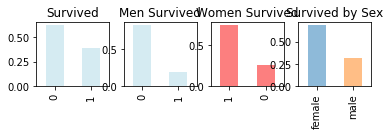

In [42]:
plt.subplot2grid((3,4), (0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=men_color)
plt.title("Survived")

plt.subplot2grid((3,4), (0,1))
df.Survived[df.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=men_color)
plt.title("Men Survived")

plt.subplot2grid((3,4), (0,2))
df.Survived[df.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Women Survived") #70% Survived! See column inversion!

plt.subplot2grid((3,4), (0,3))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived by Sex") 

plt.show()

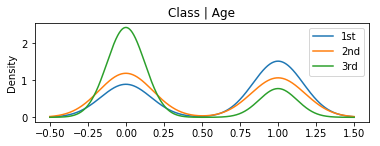

In [46]:
plt.subplot2grid((2,3),(1,0), colspan=4)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Class | Age")
plt.legend(("1st", "2nd", "3rd"))
#So, looking at 0 (died), highest casualties in third class. Survivors, highest rate seen in first class.

Text(0.5,1,'Rich Male')

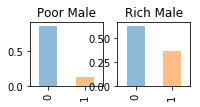

In [52]:
plt.subplot2grid((3,4), (2,0))
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Poor Male") 

plt.subplot2grid((3,4), (2,1))
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Rich Male") 


In [37]:
train = pd.read_csv("train.csv")

In [68]:
def clean_date(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())
    
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    
    
    
    #normalization of string values to ints

In [38]:
dc.clean_data(train)

In [41]:
poly_transform = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly_transform.fit_transform(features)

In [34]:
target_output = train["Survived"].values
features = train[["Pclass", "Age", "Fare", "Embarked", "SibSp", "Parch"]].values

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target_output)


In [35]:
print (classifier_.score(features, target_output)) #will print accuracy

0.7182940516273849


In [43]:
#For the polynomial features
classifier_ = classifier.fit(poly_features, target_output)
print (classifier_.score(poly_features, target_output))

0.7351290684624018


Decision Tree

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, model_selection
import Data_Clean as dc


In [45]:
train = pd.read_csv("train.csv")
dc.clean_data(train)

In [48]:
target = train["Survived"].values
feature_names = ["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]
features = train[feature_names].values

In [53]:
generalized_tree = tree.DecisionTreeClassifier(
    random_state = 1,
    max_depth = 7,
    min_samples_split = 2)
generalized_tree_ = generalized_tree.fit(features, target)

print (generalized_tree_.score(features, target))

#Overfitting problem (97%)! Play hide and seek with the algorithm, intentionally remove part of data
#The part that youre hiding is called the validation set

scores = model_selection.cross_val_score(generalized_tree, features, target, scoring='accuracy', cv=50)
print (scores)
print (scores.mean())

0.8787878787878788
[0.77777778 0.66666667 0.77777778 0.94444444 0.83333333 0.88888889
 0.61111111 0.83333333 0.88888889 0.88888889 0.72222222 0.66666667
 0.83333333 0.77777778 0.72222222 0.83333333 0.94444444 0.72222222
 0.94444444 0.83333333 0.88888889 0.83333333 0.83333333 0.88888889
 0.94444444 0.83333333 0.83333333 0.83333333 0.77777778 0.88888889
 0.72222222 0.66666667 0.88888889 0.88888889 0.83333333 0.77777778
 0.72222222 0.66666667 0.88888889 0.77777778 0.83333333 0.88888889
 0.88235294 0.94117647 0.82352941 0.70588235 0.88235294 0.82352941
 1.         0.9375    ]
0.8243709150326798


In [55]:
tree.export_graphviz(generalized_tree_, feature_names=feature_names, out_file="tree.dot")